# Model

In [ ]:
# We'll use a model based on the bilingual language model
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-xlm-roberta-base-sentiment")
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-xlm-roberta-base-sentiment")
sa = pipeline("sentiment-analysis", tokenizer=tokenizer, model=model)

In [ ]:
pre_twit = preprocess_tweet(df.loc[1201].content)
print(pre_twit)
p = sa(pre_twit)
print(p)

hatayda deprem anı çok korkutucu gerçekten bu deprem travmalarını nasıl
[{'label': 'negative', 'score': 0.9467036724090576}]


In [ ]:
def get_sentiment_analysis(tweet):
    """True if tweet has positive compound sentiment, False otherwise."""
    p = sa(str(tweet))  # sa pipeline
    return pd.Series([p[0]["label"], round(p[0]["score"],4)])

In [ ]:
get_sentiment_analysis(df['content'])

0    negative
1      0.4120
dtype: object

###Sentiment Analysis




In [ ]:
df["sentiment_label"] = "-"
df["sentiment_score"] = -1
df[["sentiment_label", "sentiment_score"]] = df["content"].progress_apply(get_sentiment_analysis)

  0%|          | 0/132934 [00:00<?, ?it/s]

In [ ]:
temp = df.groupby('sentiment_label').count()['content'].reset_index().sort_values(by='content',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment_label,content
0,negative,69830
1,neutral,50946
2,positive,12158


In [ ]:
df['sentiment_score'].apply(lambda x: float(x)).head()

180   0.5588
192   0.9200
213   0.8577
219   0.9250
257   0.7259
Name: sentiment_score, dtype: float64

In [ ]:
df_positive = df[df["sentiment_label"]=="positive"]
df_positive.head()

,date,content,hashtags,like_count,rt_count,followers_count,isVerified,language,coordinates,place,source,sentiment_label,sentiment_score
267,2023-02-21,taner savut 9899 yıllarında joachim beğendiği ...,"['samandag', 'depremoldu', 'Turkey', 'earthqua...",0.0000,0.0000,11431.0000,False,tr,NaN,NaN,Twitter for iPhone,positive,0.6579
409,2023-02-20,pray for türkiye,"['AnotherEarthquake', 'earthquake', 'TurkeyEar...",1.0000,0.0000,19.0000,False,tr,NaN,NaN,Twitter for Android,positive,0.3649
414,2023-02-20,pray for türkiye,"['AnotherEarthquake', 'earthquake', 'TurkeyEar...",2.0000,1.0000,19.0000,False,tr,NaN,NaN,Twitter for Android,positive,0.3649
433,2023-02-20,çok geçmiş olsun türkiye ve dünyaın herkes sen...,"['Turkey', 'depremadana', 'earthquake', 'Hatay...",0.0000,0.0000,3.0000,False,tr,NaN,NaN,Twitter for Android,positive,0.8389
584,2023-02-20,depremden önce allah korusun inşallah bir şey ...,"['deprem', 'hatay', 'syria', 'suriye', 'bugün'...",2.0000,0.0000,9.0000,False,tr,NaN,NaN,Twitter for Android,positive,0.4101


In [ ]:
df_negative = df[df["sentiment_label"]=="negative"]
df_negative.head()

,date,content,hashtags,like_count,rt_count,followers_count,isVerified,language,coordinates,place,source,sentiment_label,sentiment_score
192,2023-02-21,vatan hainleri yine tag en okullar açik açik m...,"['70ildeOkullarKapatılsın', 'deprem', 'earthqu...",3.0000,1.0000,0.0000,False,tr,NaN,NaN,Twitter for iPhone,negative,0.9200
213,2023-02-21,bizi sal artık,"['earthquake', 'turkeyearthquake2023', 'Turkey...",0.0000,0.0000,1252.0000,False,tr,NaN,NaN,Twitter for Android,negative,0.8577
219,2023-02-21,türkiyenin güneyi ve suriyede büyüklüğündeki d...,"['Turkey', 'earthquake', 'Syria']",0.0000,0.0000,3338.0000,False,tr,NaN,NaN,Twitter for Android,negative,0.9250
257,2023-02-21,selocum onlar istifa devlet malı deniz yemeyen...,"['earthquake', 'Erdbeben', 'depremoldu', 'Turk...",0.0000,0.0000,297.0000,False,tr,"Coordinates(longitude=40.149462, latitude=37.8...","Place(fullName='Diyarbakır, Türkiye', name='Di...",Twitter for Android,negative,0.7259
280,2023-02-21,bu ülkede geçer dediğimiz hiç bi şey geçmiyor ...,"['earthquake', 'Turkey']",5.0000,0.0000,1998.0000,False,tr,NaN,NaN,Twitter for iPhone,negative,0.8951


In [ ]:
df_neutral = df[df["sentiment_label"]=="neutral"]
df_neutral.head()

,date,content,hashtags,like_count,rt_count,followers_count,isVerified,language,coordinates,place,source,sentiment_label,sentiment_score
180,2023-02-21,hayatını kaybeden çocukların anısına bazı enka...,"['earthquake', 'DEPREMANI', 'depremoldu', 'dep...",1.0000,0.0000,149.0000,False,tr,NaN,NaN,Twitter for Android,neutral,0.5588
363,2023-02-20,bu akşam da saat büyüklüğündeki depremin yaşan...,"['Deprem', 'hatay', 'İdlib', 'Earthquake', 'Id...",1.0000,0.0000,90.0000,False,tr,NaN,NaN,Twitter Web App,neutral,0.7822
600,2023-02-20,nasıl bir güce sahip olduğu anlamak güç ayrı ü...,"['Hatay', 'deprem', 'suriye', 'Lübnan', 'İsrai...",0.0000,0.0000,705.0000,False,tr,NaN,NaN,Twitter for Android,neutral,0.6058
761,2023-02-20,adıyaman merkezde tane çadır ihtiyacımız var e...,"['earthquake', 'Turkey', 'hatay', 'defne', 'de...",10.0000,12.0000,1575.0000,False,tr,NaN,NaN,Twitter for Android,neutral,0.5274
782,2023-02-20,hataysamandağ acilçadır hataydefne acilçadırya...,"['deprem', 'earthquake', 'TurkeyEarthquake', '...",0.0000,0.0000,84.0000,False,tr,NaN,NaN,Twitter for Android,neutral,0.3856


In [ ]:
print("total number: ",len(df))
print("positive number: ",len(df_positive))
print("negative number: ", len(df_negative))
print("neutral number: ", len(df_neutral))
print("**********************")
print("% of positive: ",round(100*len(df_positive)/len(df),2))
print("% of negative: ",round(100*len(df_negative)/len(df),2))
print("% of neutral: ",round(100*len(df_neutral)/len(df),2))

total number:  132934
positive number:  12158
negative number:  69830
neutral number:  50946
**********************
% of positive:  9.15
% of negative:  52.53
% of neutral:  38.32


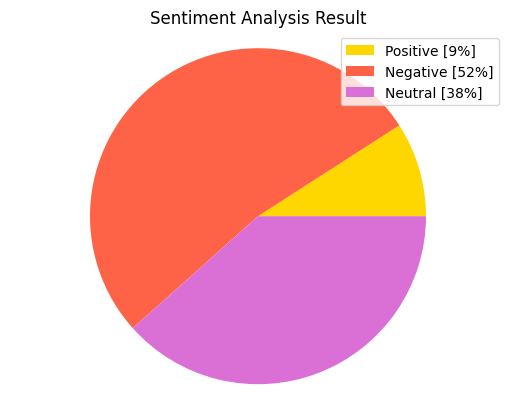

In [ ]:
positive = int(100*len(df_positive)/len(df))
negative = int(100*len(df_negative)/len(df))
neutral = int(100*len(df_neutral)/len(df))

labels = [f'Positive [{str(positive)}%]', f'Negative [{str(negative)}%]', f'Neutral [{str(neutral)}%]']

sizes = [positive, negative, neutral]
colors = ['gold','tomato','orchid']

patches, texts = plt.pie(sizes,colors=colors)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result")
plt.axis("equal")
plt.show()

In [ ]:
tweets_agg_df = df.groupby(["date", "sentiment_label"])["hashtags"].count().reset_index()[0:15]
tweets_agg_df.columns = ["date", "sentiment_label", "count"]
tweets_agg_df

,date,sentiment_label,count
0,2023-02-06,negative,26563
1,2023-02-06,neutral,17266
2,2023-02-06,positive,4133
3,2023-02-07,negative,21911
4,2023-02-07,neutral,16669
5,2023-02-07,positive,3392
6,2023-02-08,negative,11788
7,2023-02-08,neutral,9113
8,2023-02-08,positive,1941
9,2023-02-09,negative,6097


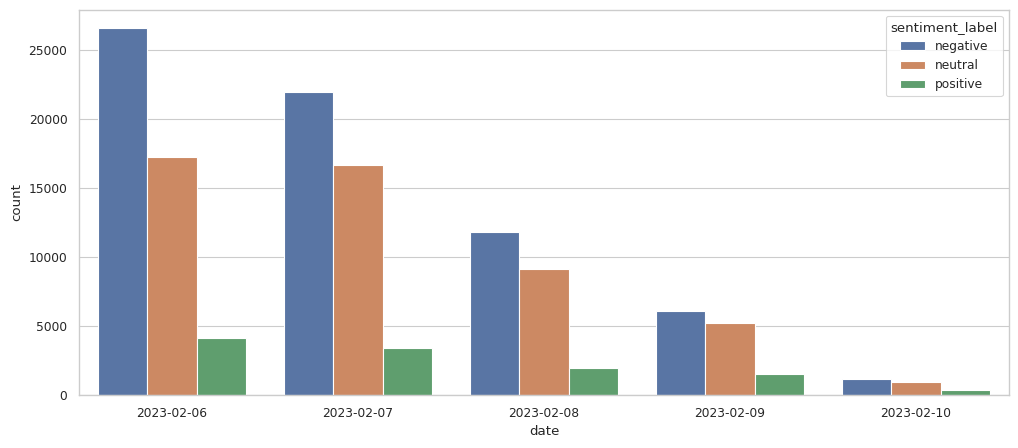

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x = 'date', y = 'count', hue = 'sentiment_label', data = tweets_agg_df);

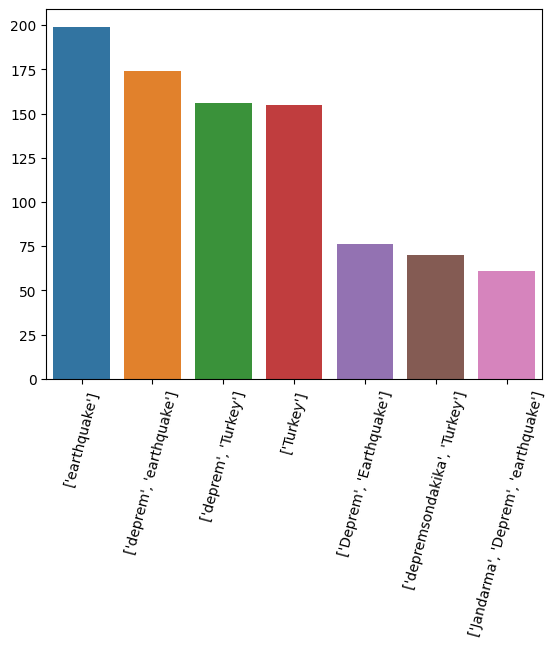

In [ ]:
hashtags = df['hashtags'].value_counts().nlargest(7)
sns.barplot(x=hashtags.index, y=top_hashtags.values)
plt.xticks(rotation=75)
plt.show()